# 데이터 확인

In [1]:
import os
import json
import pandas as pd

# 최상위 경로 설정
root_dir = '../data/CAT_image_2nd'
json_count = 0


# 하위 폴더 개수 세기
folder_count = sum(
    os.path.isdir(os.path.join(root_dir, name))
    for name in os.listdir(root_dir)
)

print(f"📁 폴더 개수: {folder_count}개")

for folder_name in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder_name)

    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.json'):
                json_count += 1

print(f"📦 JSON 파일 개수: {json_count}개")

📁 폴더 개수: 14329개
📦 JSON 파일 개수: 14329개


## Step01 : 전체 데이터 확인 및 라벨 전처리

In [2]:
# 정규화할 라벨 매핑 정의 : 태윤님 라벨링 작업과 Align
action_label_map = {
    "걷거나 뜀": "걷거나 달리는 동작",
    "걷거나 뜀 ": "걷거나 달리는 동작",
    "걷거나 뛰는 동작": "걷거나 달리는 동작",

    "꼬리를 흔든다": "꼬리를 흔드는 동작",
    "꼬리를 흔드는 동작": "꼬리를 흔드는 동작",

    "납작 엎드림": "납작 엎드리는 동작",
    "납작 엎드리는 동작": "납작 엎드리는 동작",

    "배를 보임": "배를 보여주는 동작",
    "배를 보이는 동작": "배를 보여주는 동작",
    "배를 보여주는 동작": "배를 보여주는 동작",

    "그루밍함": "그루밍하는 동작",
    "그루밍하는 동작": "그루밍하는 동작",

    "머리를 들이댐": "머리를 들이대는 동작",
    "머리를 들이대는 동작": "머리를 들이대는 동작",

    "발을 숨기고 웅크리고 앉음": "발을 숨기고 웅크리고 앉는 동작",
    "발을 숨기고 웅크리고 앉는 동작": "발을 숨기고 웅크리고 앉는 동작",

    "앞발로 꾹꾹 누름": "앞발로 꾹꾹 누르는 동작",
    "앞발로 꾹꾹 누르는 동작": "앞발로 꾹꾹 누르는 동작",

    "옆으로 누워 있음": "옆으로 눕는 동작",
    "옆으로 눕는 동작": "옆으로 눕는 동작",

    "좌우로 뒹굴음": "좌우로 뒹구는 동작",
    "좌우로 뒹구는 동작": "좌우로 뒹구는 동작",

    "팔을 뻗어 휘적거림": "팔을 뻗어 휘적거리는 동작",
    "앞발을 뻗어 휘적거리는 동작": "팔을 뻗어 휘적거리는 동작",

    "허리를 아치로 세움": "허리를 아치로 세우는 동작",
    "허리를 아치로 세우는 동작": "허리를 아치로 세우는 동작"
}

In [3]:
situation_label_map = {
    # 기타
    "공격성_기타": "기타",
    "공포_기타": "기타",
    "불안/슬픔_기타": "기타",
    "편안/안정_기타": "기타",
    "행복/즐거움_기타": "기타",
    "화남/불쾌_기타": "기타",

    # 낯선 소리 관련
    "공격성_초인종 소리가 났을 때": "낯선 소리",
    "공격성_낯선 소리가 났을 때": "낯선 소리",
    "공격성_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",
    "공포_초인종 소리가 났을 때": "낯선 소리",
    "공포_낯선 소리가 났을 때": "낯선 소리",
    "공포_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",
    "불안/슬픔_낯선 소리가 났을 때": "낯선 소리",
    "불안/슬픔_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",
    "편안/안정_낯선 소리가 났을 때": "낯선 소리",
    "편안/안정_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",
    "행복/즐거움_초인종 소리가 났을 때": "낯선 소리",
    "행복/즐거움_낯선 소리가 났을 때": "낯선 소리",
    "행복/즐거움_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",
    "화남/불쾌_초인종 소리가 났을 때": "낯선 소리",
    "화남/불쾌_낯선 소리가 났을 때": "낯선 소리",
    "화남/불쾌_낯선 소리가 나거나 낯선 사람을 봤을 때": "낯선 소리",

    # 낯선 사람/동물/장소 관련
    "공격성_낯선 도구를 자신의 몸에 사용할 때(미용도구 등)": "미용/위생관리",
    "공격성_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "공포_낯선 도구를 자신의 몸에 사용할 때(미용도구)": "미용/위생관리",
    "공포_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "불안/슬픔_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "편안/안정_낯선 도구를 자신의 몸에 사용할 때(미용도구 등)": "미용/위생관리",
    "편안/안정_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "행복/즐거움_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "화남/불쾌_빗질/발톱깍기/목욕 등 위생관리를 할 때": "미용/위생관리",
    "목욕할 때": "미용/위생관리",
    "목욕하거나 싫어하는 부위를 만질 때" : "미용/위생관리",
    
    "공격성_낯선 동물 또는 사람을 만났을 때": "낯선 사람/동물",
    "공격성_다른 동물을 보거나 낯선 사람을 만날 때": "낯선 사람/동물",
    "공격성_다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "낯선 사람/동물",
    "공포_다른 사람이나 동물을 만났을 때": "낯선 사람/동물",
    "공포_낯선 동물 또는 사람을 만났을 때": "낯선 사람/동물",
    "불안/슬픔_다른 동물을 보거나 낯선 사람을 만날 때": "낯선 사람/동물",
    "불안/슬픔_다른 사람이나 동물을 만났을 때": "낯선 사람/동물",
    "편안/안정_다른 동물을 보거나 낯선 사람을 만날 때": "낯선 사람/동물",
    "편안/안정_다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "낯선 사람/동물",
    "편안/안정_다른 사람이나 동물을 만났을 때": "낯선 사람/동물",
    "행복/즐거움_다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "낯선 사람/동물",
    "행복/즐거움_다른 사람이나 동물을 만났을 때": "낯선 사람/동물",
    "화남/불쾌_낯선 동물 또는 사람을 만났을 때": "낯선 사람/동물",
    "화남/불쾌_다른 동물을 보거나 낯선 사람을 만날 때": "낯선 사람/동물",
    "화남/불쾌_다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "낯선 사람/동물",
    "화남/불쾌_다른 사람이나 동물을 만났을 때": "낯선 사람/동물",

    "공격성_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",
    "공포_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",
    "불안/슬픔_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",
    "편안/안정_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",
    "행복/즐거움_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",
    "화남/불쾌_낯선 장소에 있거나 낯선 소리가 날 때": "낯선 장소",

    # 산책 관련
    "공격성_산책이나 노즈워크 중": "산책 중/산책 준비",
    "불안/슬픔_산책 준비 또는 산책중일 때": "산책 중/산책 준비",
    "불안/슬픔_산책이나 노즈워크 중": "산책 중/산책 준비",
    "편안/안정_산책 준비 또는 산책중일 때": "산책 중/산책 준비",
    "편안/안정_산책이나 노즈워크 중": "산책 중/산책 준비",
    "행복/즐거움_산책 준비 또는 산책중일 때": "산책 중/산책 준비",
    "행복/즐거움_산책이나 노즈워크 중": "산책 중/산책 준비",
    "화남/불쾌_산책 준비 또는 산책중일 때": "산책 중/산책 준비",
    "화남/불쾌_산책이나 노즈워크 중": "산책 중/산책 준비",

    # 먹을 것/장난감 관련 (추가)
    "공격성_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",
    "공포_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",
    "불안/슬픔_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",
    "편안/안정_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",
    "행복/즐거움_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",
    "화남/불쾌_먹을것, 장난감이 앞에 있을 때": "먹을 것/장난감이 앞에 있을 때",

    # 싫어하는 부위 접촉 (추가)
    "공격성_싫어하는 부위를 만질 때": "싫어하는 부위 접촉",
    "불안/슬픔_싫어하는 부위를 만질 때": "싫어하는 부위 접촉",
    "편안/안정_싫어하는 부위를 만질 때": "싫어하는 부위 접촉",
    "행복/즐거움_싫어하는 부위를 만질 때": "싫어하는 부위 접촉",
    "화남/불쾌_싫어하는 부위를 만질 때": "싫어하는 부위 접촉",

    # 보호자 관련
    "공격성_보호자가 집에 돌아왔을 때": "보호자 돌아옴",
    "공포_보호자가 집에 돌아왔을 때": "보호자 돌아옴",
    "불안/슬픔_보호자가 집에 돌아왔을 때": "보호자 돌아옴",
    "편안/안정_보호자가 집에 돌아왔을 때": "보호자 돌아옴",
    "행복/즐거움_보호자가 집에 돌아왔을 때": "보호자 돌아옴",
    "화남/불쾌_보호자가 집에 돌아왔을 때": "보호자 돌아옴",

    "공격성_보호자에게 혼났을 때": "보호자에게 혼남",
    "불안/슬픔_보호자에게 혼났을 때": "보호자에게 혼남",
    "편안/안정_보호자에게 혼났을 때": "보호자에게 혼남",
    "화남/불쾌_보호자에게 혼났을 때": "보호자에게 혼남",
    "혼날 때" : "보호자에게 혼남",

    "불안/슬픔_보호자와 떨어지거나 혼자 남겨졌을 때": "보호자와 분리",
    "편안/안정_보호자와 떨어지거나 혼자 남겨졌을 때": "보호자와 분리",
    "행복/즐거움_보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때": "보호자와 분리",
    "화남/불쾌_보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때": "보호자와 분리",

    # 편안한 접촉
    "공격성_편안히 쓰다듬어 줄 때": "편안한 접촉",
    "불안/슬픔_편안히 쓰다듬어 줄 때": "편안한 접촉",
    "편안/안정_편안히 쓰다듬어 줄 때": "편안한 접촉",
    "행복/즐거움_편안히 쓰다듬어 줄 때": "편안한 접촉",
    "화남/불쾌_편안히 쓰다듬어 줄 때": "편안한 접촉",

    # 잠들기 전/같이 누움
    "공격성_잠들기 전이나 같이 누워있을 때": "잠들기 전/같이 누움",
    "불안/슬픔_잠들기 전이나 같이 누워있을 때": "잠들기 전/같이 누움",
    "편안/안정_잠들기 전이나 같이 누워있을 때": "잠들기 전/같이 누움",
    "행복/즐거움_잠들기 전이나 같이 누워있을 때": "잠들기 전/같이 누움",
    "화남/불쾌_잠들기 전이나 같이 누워있을 때": "잠들기 전/같이 누움",

    # 휴식/자기 공간
    "공격성_휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/자기 공간",
    "불안/슬픔_휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/자기 공간",
    "편안/안정_휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/자기 공간",
    "행복/즐거움_휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/자기 공간",
    "화남/불쾌_휴식시간, 자신만의 공간에 들어갔을 때(캔넬, 소파 침대 밑 등)": "휴식/자기 공간",
        # 기타

    # 낯선 사람/동물/장소 관련
    "낯선 동물 또는 사람을 만났을 때": "낯선 사람/동물",
    
    # 산책 관련
    "다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "산책 중/산책 준비",
    "산책 나왔을 때": "산책 중/산책 준비",
    
    "목욕하거나 싫어하는 부위를 만질 때" : "미용/위생관리",
    "목욕할 때" : "미용/위생관리",


    # 먹을 것/장난감 관련 (추가)


    # 싫어하는 부위 접촉 (추가)
    "낯선 도구를 자신의 몸에 사용할 때(미용도구 등)": "미용/위생관리",


    # 보호자 관련
    "보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때": "보호자와 분리",
    
    "혼날 때" : "보호자에게 혼남"
}


In [4]:
import os
import json
import csv

json_root = "../data/CAT_image_2nd/"
output_csv = "../data/summary_normalized.csv"

header = ["video_name", "frames", "action", "emotion", "situation"]

with open(output_csv, "w", newline='', encoding='utf-8') as f_out:
    writer = csv.writer(f_out)
    writer.writerow(header)

    # json_root 아래 모든 폴더 리스트
    folder_list = [f for f in os.listdir(json_root) if os.path.isdir(os.path.join(json_root, f))]

    for i, folder_name in enumerate(folder_list, 1):
        folder_path = os.path.join(json_root, folder_name)

        json_files = [f for f in os.listdir(folder_path) if f.endswith(".json")]

        if len(json_files) == 0:
            print(f"Warning: No JSON file found in folder {folder_name}")
            continue

        json_path = os.path.join(folder_path, json_files[0])

        with open(json_path, 'r', encoding='utf-8') as f_json:
            data = json.load(f_json)

            # video_name에 폴더 전체 경로 (상대경로) 넣기
            video_name = folder_path    # <- 여기 수정

            frames_count = len([img for img in os.listdir(folder_path) if img.endswith(".jpg")])

            raw_action = data.get("metadata", {}).get("action", "") or data.get("metadata", {}).get("inspect", {}).get("action", "")
            raw_emotion = data.get("metadata", {}).get("inspect", {}).get("emotion", "")
            raw_situation = data.get("metadata", {}).get("owner", {}).get("situation", "")

            action = action_label_map.get(raw_action, raw_action)
            combined_key = f"{raw_emotion}_{raw_situation}"
            situation = situation_label_map.get(combined_key, raw_situation)

            writer.writerow([video_name, frames_count, action, raw_emotion, situation])

    print("Done!")

Done!


데이터 확인

In [5]:
# 데이터 상태 확인용도로 함수 정의함
def print_label_distribution(df):
    label_columns = ['action', 'emotion', 'situation']
    for col in label_columns:
        print(f"🔹 {col} 분포:")
        print(df[col].value_counts())
        print()
        
        unique_labels = sorted(df[col].unique())
        print(f"🔹 {col} 라벨 셋 ({len(unique_labels)}개):")
        for label in unique_labels:
            print(f"  - {label}")
        print("\n")
        
situation_label_map = {
    # 기타

    # 낯선 사람/동물/장소 관련
    "낯선 동물 또는 사람을 만났을 때": "낯선 사람/동물",
    
    # 산책 관련
    "다른 동물을 보거나 낯선 사람을 만날 때 산책 나왔을 때": "산책 중/산책 준비",
    "산책 나왔을 때": "산책 중/산책 준비",
    
    "목욕하거나 싫어하는 부위를 만질 때" : "미용/위생관리",
    "목욕할 때" : "미용/위생관리",


    # 먹을 것/장난감 관련 (추가)


    # 싫어하는 부위 접촉 (추가)
    "낯선 도구를 자신의 몸에 사용할 때(미용도구 등)": "미용/위생관리",


    # 보호자 관련
    "보호자와 떨어질 때/혼자 남겨지거나 낯선장소에 있을 때": "보호자와 분리",
    
    "혼날 때" : "보호자에게 혼남"
}


In [6]:
# df = pd.read_csv("../data/summary_normalized.csv")

# df['action'] = df['action'].apply(lambda x: action_label_map.get(x.strip(), x.strip()) if isinstance(x, str) else x)
# df['situation'] = df['situation'].apply(lambda x: situation_label_map.get(x.strip(), x.strip()) if isinstance(x, str) else x)

# print_label_distribution(df)

### Step02 : 프레임 수 고려해서 train/val/test dataset Setting

In [7]:
# df['frames'].describe()

In [8]:
# df_filtered = df[(df['frames'] >= 25) & (df['frames'] <= 150)]
# df_filtered['frames'].describe()

In [9]:
# print_label_distribution(df_filtered)

In [10]:
# df_filtered.to_csv("df_filtered.csv", index=False)

situation과 emotion조합으로 train/val로 나눌려고 했으나 샘플수가 적어서 pass

In [11]:
# # stratify 기준 컬럼 생성
# df['stratify_col'] = df['situation'] + "_" + df['emotion']


In [12]:
# 산책 중/산책 준비_행복/즐거움                                1
# 잠들기 전이나 같이 누워있을 때_공격성                            1
# 미용/위생관리_행복/즐거움                                   1
# 산책이나 노즈워크 중_공격성                                  1
# 낯선 소리가 났을 때_화남/불쾌                                1

In [13]:
# combo_counts =df['stratify_col'].value_counts()
# combo_counts
# valid_combos = combo_counts[combo_counts >= 2].index
# df_valid = df[df['stratify_col'].isin(valid_combos)]

In [14]:
# print_label_distribution(df_valid)
# df_valid

In [16]:
df = pd.read_csv("../data/setting_1st.csv")

combo_counts =df['stratify_col'].value_counts()
combo_counts
valid_combos = combo_counts[combo_counts >= 2].index
df_valid = df[df['stratify_col'].isin(valid_combos)]

In [21]:
print_label_distribution(df)

🔹 action 분포:
action
그루밍하는 동작             4349
꼬리를 흔드는 동작           2133
걷거나 달리는 동작           1492
발을 숨기고 웅크리고 앉는 동작    1292
옆으로 눕는 동작            1188
팔을 뻗어 휘적거리는 동작        823
머리를 들이대는 동작           737
배를 보여주는 동작            709
앞발로 꾹꾹 누르는 동작         671
좌우로 뒹구는 동작            566
납작 엎드리는 동작            319
허리를 아치로 세우는 동작         50
Name: count, dtype: int64

🔹 action 라벨 셋 (12개):
  - 걷거나 달리는 동작
  - 그루밍하는 동작
  - 꼬리를 흔드는 동작
  - 납작 엎드리는 동작
  - 머리를 들이대는 동작
  - 발을 숨기고 웅크리고 앉는 동작
  - 배를 보여주는 동작
  - 앞발로 꾹꾹 누르는 동작
  - 옆으로 눕는 동작
  - 좌우로 뒹구는 동작
  - 팔을 뻗어 휘적거리는 동작
  - 허리를 아치로 세우는 동작


🔹 emotion 분포:
emotion
편안/안정     11458
행복/즐거움     1875
공격성         398
화남/불쾌       394
불안/슬픔       185
공포           19
Name: count, dtype: int64

🔹 emotion 라벨 셋 (6개):
  - 공격성
  - 공포
  - 불안/슬픔
  - 편안/안정
  - 행복/즐거움
  - 화남/불쾌


🔹 situation 분포:
situation
휴식/자기 공간                  3511
기타                        3475
먹을 것/장난감이 앞에 있을 때         2384
잠들기 전/같이 누움               2196
편안한 접촉                     945
보호자 돌아옴          

In [22]:
# stratified split
from sklearn.model_selection import train_test_split
# stratified split
train_val, test = train_test_split(
    df_valid, test_size=0.2, random_state=42,
    stratify=df_valid['stratify_col']
)

train, val = train_test_split(
    train_val,
    test_size=0.25,  # 0.25 * 0.8 = 0.2
    random_state=42,
    stratify=train_val['stratify_col']
)


In [23]:
# 또는 개별 label별 분포도 확인 가능
print("\n[Train] situation:\n", train['stratify_col'].value_counts(normalize=True))
print("[Train] emotion:\n", train['stratify_col'].value_counts(normalize=True))


[Train] situation:
 stratify_col
휴식/자기 공간_편안/안정              0.241010
기타_편안/안정                    0.211451
잠들기 전/같이 누움_편안/안정           0.151984
먹을 것/장난감이 앞에 있을 때_행복/즐거움    0.083673
편안한 접촉_편안/안정                0.062958
                              ...   
싫어하는 부위 접촉_행복/즐거움           0.000233
편안한 접촉_공격성                  0.000233
먹을 것/장난감이 앞에 있을 때_공포        0.000233
낯선 장소_행복/즐거움                0.000233
미용/위생관리_행복/즐거움              0.000233
Name: proportion, Length: 69, dtype: float64
[Train] emotion:
 stratify_col
휴식/자기 공간_편안/안정              0.241010
기타_편안/안정                    0.211451
잠들기 전/같이 누움_편안/안정           0.151984
먹을 것/장난감이 앞에 있을 때_행복/즐거움    0.083673
편안한 접촉_편안/안정                0.062958
                              ...   
싫어하는 부위 접촉_행복/즐거움           0.000233
편안한 접촉_공격성                  0.000233
먹을 것/장난감이 앞에 있을 때_공포        0.000233
낯선 장소_행복/즐거움                0.000233
미용/위생관리_행복/즐거움              0.000233
Name: proportion, Length: 69, dtype: float64


In [24]:
print(f"Train: {len(train['frames'])} | Val: {len(val['frames'])} | Test: {len(test['frames'])}")

Train: 8593 | Val: 2865 | Test: 2865


/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


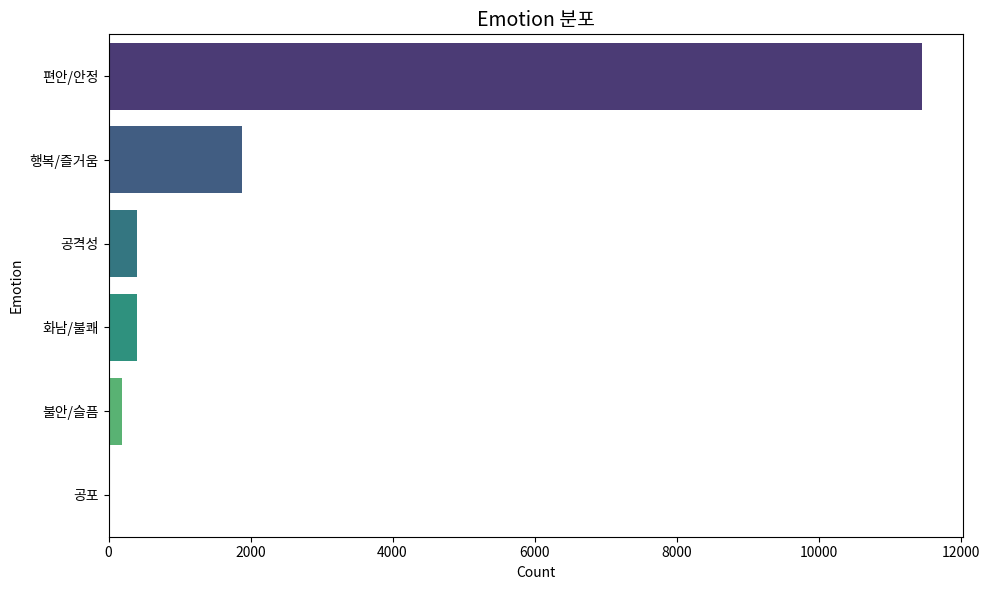

/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


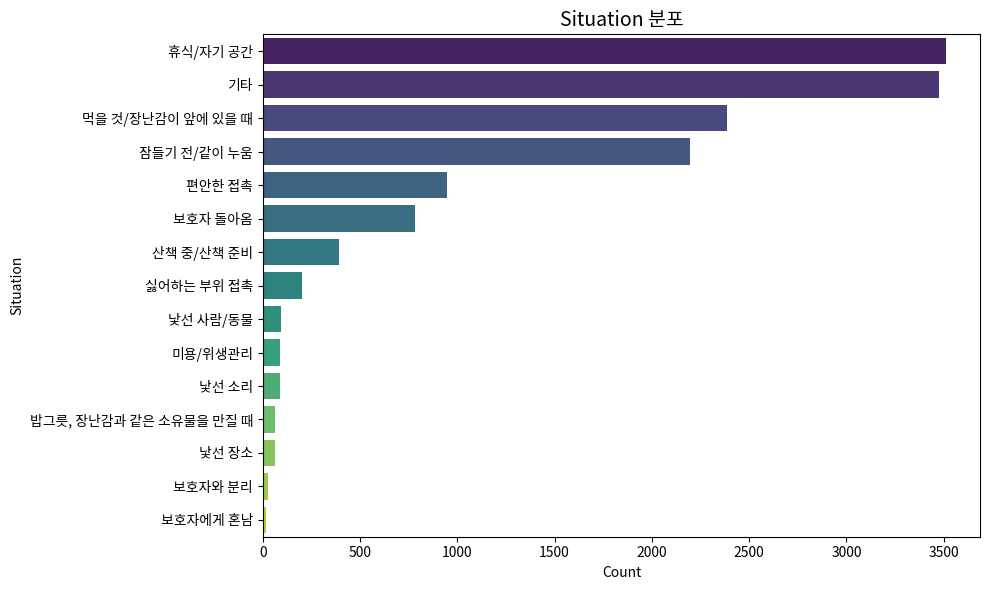

/tmp/ipykernel_1495506/2025028682.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


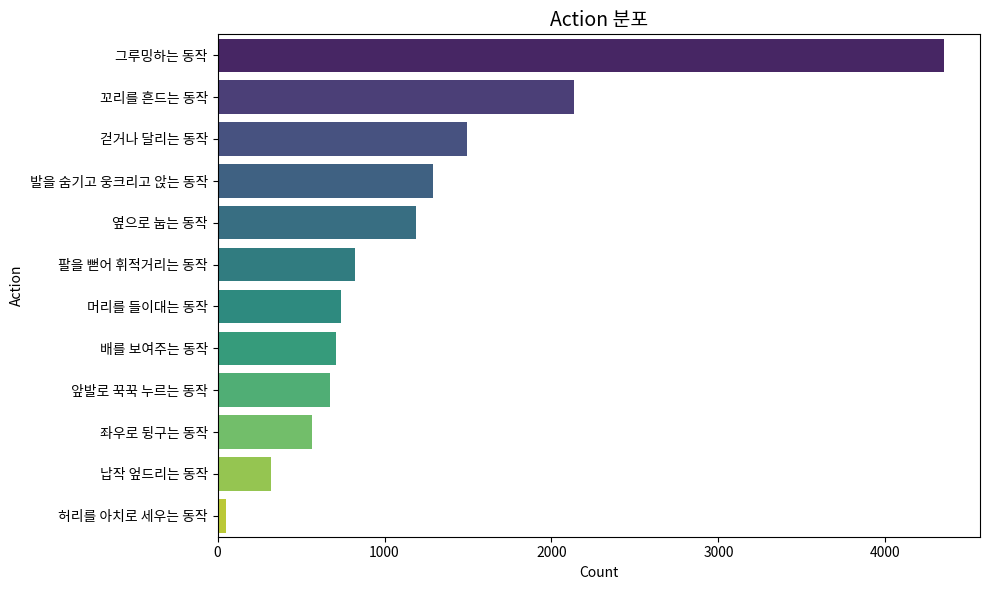

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import warnings

# matplotlib findfont 경고 끄기
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")
# matplotlib 내부 로깅 레벨을 WARNING 이상으로 올리기


# NotoSansCJK 폰트 경로 지정
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False
# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 시각화 함수
def plot_label_distribution(df, column_name, top_n=None):
    plt.figure(figsize=(10, 6))
    value_counts = df[column_name].value_counts()

    if top_n:
        value_counts = value_counts[:top_n]

    sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")
    plt.title(f"{column_name.capitalize()} 분포", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(column_name.capitalize())
    plt.tight_layout()
    plt.show()

# 각각 라벨 분포 시각화
plot_label_distribution(df, 'emotion')
plot_label_distribution(df, 'situation')
plot_label_distribution(df, 'action')


In [ ]:
def plot_label_distribution_by_frames(df, column_name, top_n=None):
    plt.figure(figsize=(10, 6))
    
    # 라벨별 프레임 수 총합 계산
    label_frame_counts = df.groupby(column_name)['frames'].sum().sort_values(ascending=False)

    if top_n:
        label_frame_counts = label_frame_counts[:top_n]

    sns.barplot(x=label_frame_counts.values, y=label_frame_counts.index, palette="viridis")
    plt.title(f"{column_name} (프레임 기준) 분포", fontsize=14)
    plt.xlabel("총 프레임 수")
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()

# 프레임 기준 분포 시각화
plot_label_distribution_by_frames(df, 'emotion')
plot_label_distribution_by_frames(df, 'situation')
plot_label_distribution_by_frames(df, 'action')

In [25]:
train = train.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])
test = test.drop(columns=['stratify_col'])

In [ ]:
# train, val, test
# train.to_csv("../data/train_fin.csv", index=False)
# val.to_csv("../data/val_fin.csv", index=False)
# test.to_csv("../data/test_fin.csv", index=False)

### step03 : 샘플링 전랴

In [ ]:
df_valid.head()

In [ ]:
# # stratify 기준 컬럼 생성
# df_valid['stratify_col'] = df_valid['situation'] + "_" + df_valid['emotion']

# combo_counts =df_valid['stratify_col'].value_counts()
# # combo_counts

In [ ]:
import pandas as pd

def show(col,df):
    # 1) 각 클래스별 샘플 수 확인
    class_counts = df[col].value_counts()
    print(class_counts)

    # 2) 언더샘플링 기준: 소수 클래스 샘플 수로 맞추기 (최소 샘플 수)
    min_count = class_counts.min()
    print(f"언더샘플링 기준 샘플 수: {min_count}\n")

    # 3) 클래스별로 샘플을 랜덤하게 min_count 만큼 추출해서 합치기
    df_under = pd.concat([
        df[df[col] == cls].sample(min_count, random_state=42)
        for cls in class_counts.index
    ])

    # 4) 결과 확인
    print(df_under[col].value_counts())

In [ ]:
col = 'stratify_col'
show(col,df_valid)

In [ ]:
import pandas as pd

def under_sampling_with_threshold(df, stratify_col, threshold=10, multiplier=3, random_state=42):
    class_counts = df[stratify_col].value_counts()
    
    # 기준 이상인 클래스만 선택
    valid_classes = class_counts[class_counts >= threshold].index.tolist()
    print(f"기준 이상 클래스 수: {len(valid_classes)} / 전체 클래스 수: {len(class_counts)}")
    
    target_count = threshold * multiplier
    print(f"샘플링 목표 수: {target_count}")
    
    sampled_df_list = []
    for cls in valid_classes:
        cls_df = df[df[stratify_col] == cls]
        n_samples = min(len(cls_df), target_count)
        sampled = cls_df.sample(n_samples, random_state=random_state)
        sampled_df_list.append(sampled)
    
    # 기준 미만 클래스는 원본 그대로 포함할지 선택 (여기서는 포함)
    small_class_df = df[~df[stratify_col].isin(valid_classes)]
    sampled_df_list.append(small_class_df)
    
    result_df = pd.concat(sampled_df_list).reset_index(drop=True)
    
    print("언더샘플링 후 클래스별 샘플 수:")
    print(result_df[stratify_col].value_counts())
    
    return result_df



In [ ]:
# 사용 예
new_dataset = under_sampling_with_threshold(df_valid, 'stratify_col', threshold=10, multiplier=3)


In [ ]:
print_label_distribution(new_dataset)

In [ ]:
# stratified split
from sklearn.model_selection import train_test_split
# stratified split
train_val, test = train_test_split(
    new_dataset, test_size=0.2, random_state=42,
    stratify=new_dataset['stratify_col']
)

train, val = train_test_split(
    train_val,
    test_size=0.25,  # 0.25 * 0.8 = 0.2
    random_state=42,
    stratify=train_val['stratify_col']
)


In [ ]:
# 또는 개별 label별 분포도 확인 가능
print("\n[Train] situation:\n", train['stratify_col'].value_counts(normalize=True))
print("[Train] emotion:\n", train['stratify_col'].value_counts(normalize=True))

In [ ]:
train = train.drop(columns=['stratify_col'])
val = val.drop(columns=['stratify_col'])
test = test.drop(columns=['stratify_col'])

In [ ]:
print(f"Train: {len(train)} | Val: {len(val)} | Test: {len(test)}")

In [ ]:
# train, val, test
train.to_csv("../data/train_under.csv", index=False)
val.to_csv("../data/val_under.csv", index=False)
test.to_csv("../data/test_under.csv", index=False)

---

In [ ]:

df = pd.read_csv("../data/setting_1st.csv")

unique_names_list = df['video_name'].unique()
df

In [ ]:
import os
import pandas as pd

# CSV 로드
df = pd.read_csv("../data/setting_1st.csv")  # ← 여기에 너의 csv 경로 입력

# video_name은 확장자 제거 안 함!
df_video_names = set(df['video_name'])

# 실제 폴더 이름 리스트 추출 (디렉토리만)
root_path = "../data/CAT_image_2nd"
folder_list = [f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))]
folder_set = set(folder_list)

# 누락된 항목 확인
missing_in_df = folder_set - df_video_names
missing_in_folder = df_video_names - folder_set

# 출력
print(f"📁 폴더 개수: {len(folder_set)}")
print(f"📄 df 내 video_name 개수: {len(df_video_names)}")
print(f"❌ 폴더에는 있지만 df에는 없는 항목 수: {len(missing_in_df)}")
print(f"❌ df에는 있지만 폴더에는 없는 항목 수: {len(missing_in_folder)}")

# (선택) 누락 리스트 출력
# print("폴더에는 있는데 df에는 없는 항목:", missing_in_df)
# print("df에는 있는데 폴더에는 없는 항목:", missing_in_folder)


In [ ]:
# import pandas as pd
# import os

# csv_path = "../data/train_fin.csv"  # 기존 csv
# root_dir = "../data/CAT_image_2nd/"          # 프레임 이미지 폴더 최상위 경로

# df = pd.read_csv(csv_path)

# # video_name 컬럼에 대해 실제 폴더 경로로 변경
# # df['video_path'] = df['video_name'].apply(lambda x: os.path.join(root_dir, x))

# # 만약 기존 video_name 대신 덮어쓰려면
# df['video_name'] = df['video_name'].apply(lambda x: os.path.join(root_dir, x))

# # 새 csv로 저장
# df.to_csv("../data/train_fin_2nd.csv", index=False)
